In [1]:
import pandas as pd
import numpy as np

#                                          RF Model

In [3]:
carnival = pd.read_csv("carnival_visitors.csv")

In [4]:
carnival

,householdID,est_inc_USD,est_netw_USD,hhold_field,hhold_oldest,hhold_pax,hhold_youngest,homeState,hhold_car,stream_subs,primary
0,1,113831,418044,Finance,45,4,12,Maine,LuxurySedan,5,consume
1,2,66441,454233,Tech,44,4,11,Maine,LuxurySedan,1,entertain
2,3,160024,602594,Finance,38,2,6,Vermont,LuxurySedan,2,consume
3,4,82985,473262,Govt,39,3,8,Massachusetts,LuxurySedan,4,entertain
4,5,109369,527138,Finance,43,5,5,Massachusetts,SUV,3,consume
...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,136586,443222,Tech,48,3,11,Maine,SUV,1,consume
14996,14997,113057,540067,Govt,42,2,16,New York,Pickup,1,consume
14997,14998,103937,507584,Tech,48,6,10,Ontario,Sedan,4,consume
14998,14999,137577,528343,Tech,38,3,12,Vermont,Compact/Hybrid,1,entertain


In [5]:
carnival.columns

Index(['householdID', 'est_inc_USD', 'est_netw_USD', 'hhold_field',
       'hhold_oldest', 'hhold_pax', 'hhold_youngest', 'homeState', 'hhold_car',
       'stream_subs', 'primary'],
      dtype='object')

categorical data: 'hhold_field', 'homeState', 'hhold_car',
numerical data: 'est_inc_USD', 'est_netw_USD','hhold_oldest', 'hhold_pax', 'hhold_youngest','stream_subs'

##a
I convert them to dummies below, and the reason is: We need dummies to build Randem Forest Model and these vairables only have 2 or 3 outcomes.

In [6]:
#b
carnival1 = pd.get_dummies(carnival, drop_first = True, columns=['hhold_field', 'homeState', 'hhold_car'])
carnival1

,householdID,est_inc_USD,est_netw_USD,hhold_oldest,hhold_pax,hhold_youngest,stream_subs,primary,hhold_field_Finance,hhold_field_Govt,...,homeState_New York,homeState_Ontario,homeState_Quebec,homeState_Rhode Island,homeState_US_Other,homeState_Vermont,hhold_car_LuxurySedan,hhold_car_Pickup,hhold_car_SUV,hhold_car_Sedan
0,1,113831,418044,45,4,12,5,consume,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,66441,454233,44,4,11,1,entertain,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,160024,602594,38,2,6,2,consume,1,0,...,0,0,0,0,0,1,1,0,0,0
3,4,82985,473262,39,3,8,4,entertain,0,1,...,0,0,0,0,0,0,1,0,0,0
4,5,109369,527138,43,5,5,3,consume,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,136586,443222,48,3,11,1,consume,0,0,...,0,0,0,0,0,0,0,0,1,0
14996,14997,113057,540067,42,2,16,1,consume,0,1,...,1,0,0,0,0,0,0,1,0,0
14997,14998,103937,507584,48,6,10,4,consume,0,0,...,0,1,0,0,0,0,0,0,0,1
14998,14999,137577,528343,38,3,12,1,entertain,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
#C
from sklearn.preprocessing import LabelEncoder

In [8]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
carnival1['primary'] = labelencoder.fit_transform(carnival['primary'])
carnival1   #0 for consume, 1 for entertain 

,householdID,est_inc_USD,est_netw_USD,hhold_oldest,hhold_pax,hhold_youngest,stream_subs,primary,hhold_field_Finance,hhold_field_Govt,...,homeState_New York,homeState_Ontario,homeState_Quebec,homeState_Rhode Island,homeState_US_Other,homeState_Vermont,hhold_car_LuxurySedan,hhold_car_Pickup,hhold_car_SUV,hhold_car_Sedan
0,1,113831,418044,45,4,12,5,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,66441,454233,44,4,11,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,160024,602594,38,2,6,2,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,4,82985,473262,39,3,8,4,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,5,109369,527138,43,5,5,3,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,136586,443222,48,3,11,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14996,14997,113057,540067,42,2,16,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
14997,14998,103937,507584,48,6,10,4,0,0,0,...,0,1,0,0,0,0,0,0,0,1
14998,14999,137577,528343,38,3,12,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
pd.value_counts(carnival1['primary'])

1    7642
0    7358
Name: primary, dtype: int64

In [10]:
pd.value_counts(carnival1['primary'],normalize = True)

1    0.509467
0    0.490533
Name: primary, dtype: float64

In [11]:
#E
from sklearn.model_selection import train_test_split

In [12]:
carnival1.columns

Index(['householdID', 'est_inc_USD', 'est_netw_USD', 'hhold_oldest',
       'hhold_pax', 'hhold_youngest', 'stream_subs', 'primary',
       'hhold_field_Finance', 'hhold_field_Govt', 'hhold_field_Manufacturing',
       'hhold_field_Other', 'hhold_field_Services', 'hhold_field_Tech',
       'homeState_Connecticut', 'homeState_Maine', 'homeState_Massachusetts',
       'homeState_New Hampshire', 'homeState_New York', 'homeState_Ontario',
       'homeState_Quebec', 'homeState_Rhode Island', 'homeState_US_Other',
       'homeState_Vermont', 'hhold_car_LuxurySedan', 'hhold_car_Pickup',
       'hhold_car_SUV', 'hhold_car_Sedan'],
      dtype='object')

In [43]:
X = carnival1[['est_inc_USD', 'est_netw_USD', 'hhold_oldest',
       'hhold_pax', 'hhold_youngest', 'stream_subs', 
       'hhold_field_Finance', 'hhold_field_Govt', 'hhold_field_Manufacturing',
       'hhold_field_Other', 'hhold_field_Services', 'hhold_field_Tech',
       'homeState_Connecticut', 'homeState_Maine', 'homeState_Massachusetts',
       'homeState_New Hampshire', 'homeState_New York', 'homeState_Ontario',
       'homeState_Quebec', 'homeState_Rhode Island', 'homeState_US_Other',
       'homeState_Vermont', 'hhold_car_LuxurySedan', 'hhold_car_Pickup',
       'hhold_car_SUV', 'hhold_car_Sedan']]
y = carnival1['primary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1998)

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 14165 to 4936
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   est_inc_USD                9000 non-null   int64
 1   est_netw_USD               9000 non-null   int64
 2   hhold_oldest               9000 non-null   int64
 3   hhold_pax                  9000 non-null   int64
 4   hhold_youngest             9000 non-null   int64
 5   stream_subs                9000 non-null   int64
 6   hhold_field_Finance        9000 non-null   uint8
 7   hhold_field_Govt           9000 non-null   uint8
 8   hhold_field_Manufacturing  9000 non-null   uint8
 9   hhold_field_Other          9000 non-null   uint8
 10  hhold_field_Services       9000 non-null   uint8
 11  hhold_field_Tech           9000 non-null   uint8
 12  homeState_Connecticut      9000 non-null   uint8
 13  homeState_Maine            9000 non-null   uint8
 14  homeState_Massachuse

I use 1998 as my random_state, because I born on this year.

In [45]:
#F
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 8, 10, 12],
    'max_features': [12, 16, 20],
    'min_samples_leaf': [6, 10, 14],
}

In [17]:
from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_depth': 4, 'max_features': 16, 'min_samples_leaf': 6, 'n_estimators': 150}


In [47]:
clf=RandomForestClassifier(n_estimators=150, max_depth=4, max_features=16, min_samples_leaf=6, random_state=1998)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_features=16, min_samples_leaf=6,
                       n_estimators=150, random_state=1998)

In [60]:
#G
feature_imp_df = pd.DataFrame(list(zip(clf.feature_importances_, X_train)))
feature_imp_df.columns = ['feature importance', 'feature']
feature_imp_df = feature_imp_df.sort_values(by='feature importance', ascending=False)
feature_imp_df

,feature importance,feature
1,0.432986,est_netw_USD
0,0.176607,est_inc_USD
3,0.091073,hhold_pax
2,0.070263,hhold_oldest
4,0.064505,hhold_youngest
5,0.039244,stream_subs
18,0.024021,homeState_Quebec
6,0.010031,hhold_field_Finance
21,0.009578,homeState_Vermont
11,0.008855,hhold_field_Tech


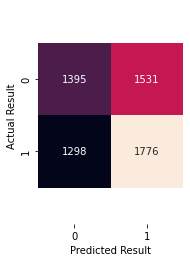

In [49]:
#H
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
predictions = clf.predict(X_test)
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

In [50]:
#H
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.52      0.48      0.50      2926
           1       0.54      0.58      0.56      3074

    accuracy                           0.53      6000
   macro avg       0.53      0.53      0.53      6000
weighted avg       0.53      0.53      0.53      6000



In [51]:
#I
from sklearn import metrics
predictions_train = clf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, predictions_train))

Accuracy: 0.5554444444444444


The accuracy is not satisfactory, I will chose the top12 feature to build a new model

In [61]:
print(feature_imp_df['feature'].head(12))

1            est_netw_USD
0             est_inc_USD
3               hhold_pax
2            hhold_oldest
4          hhold_youngest
5             stream_subs
18       homeState_Quebec
6     hhold_field_Finance
21      homeState_Vermont
11       hhold_field_Tech
23       hhold_car_Pickup
24          hhold_car_SUV
Name: feature, dtype: object


In [62]:
carnival2=carnival1[['est_netw_USD','est_inc_USD','hhold_pax','hhold_pax','hhold_youngest','hhold_youngest',
                    'stream_subs','homeState_Quebec','hhold_field_Finance','homeState_Vermont','homeState_Vermont',
                    'hhold_field_Tech','hhold_car_Pickup','hhold_car_SUV','primary']]

In [64]:
X = carnival2[['est_netw_USD','est_inc_USD','hhold_pax','hhold_pax','hhold_youngest','hhold_youngest',
                    'stream_subs','homeState_Quebec','hhold_field_Finance','homeState_Vermont','homeState_Vermont',
                    'hhold_field_Tech','hhold_car_Pickup','hhold_car_SUV']]
y = carnival2['primary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1998)

In [65]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [66]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 8, 10, 12],
    'max_features': [12, 16, 20],
    'min_samples_leaf': [6, 10, 14],
}

In [67]:
from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_depth': 4, 'max_features': 12, 'min_samples_leaf': 10, 'n_estimators': 50}


In [68]:
clf=RandomForestClassifier(n_estimators=50, max_depth=4, max_features=12, min_samples_leaf=10, random_state=1998)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_features=12, min_samples_leaf=10,
                       n_estimators=50, random_state=1998)

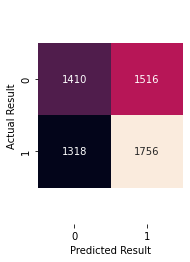

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
predictions = clf.predict(X_test)
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

In [70]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.52      0.48      0.50      2926
           1       0.54      0.57      0.55      3074

    accuracy                           0.53      6000
   macro avg       0.53      0.53      0.53      6000
weighted avg       0.53      0.53      0.53      6000



In [71]:
from sklearn import metrics
predictions_train = clf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, predictions_train))

Accuracy: 0.5578888888888889


    The description of model performance against a training set and a test set:
    In the test set, accuracy rate: 0.53 sensitivity rate: 0.57 specificity rate: 0.48 precision: 0.54 balanced accuracy:0.53. And in the training set, the accuracy rate is 0.56. There only 0.03 difference between training set and test set. It's not obviouse, so there is no problem of overfitting in this model.

    To help lobster land better predict the household's primary goal. We built this Random Forest Model. First we use all the clumns in the dataset as the feature. And we noticed the accuracy is not satisfied enough. So, we decide to modify our model by reducing some not important feature. Finally, we only keep top12 feature in our model. 
    It is worth noting that the importance of 'est_netw_USD' is 0.43, which is much more higher than other feature. It means when we predict the household's primary goal, the net worth of household's members is really worth considering. 
    By using the random forest model, we have a more than 50% accuracy to predict the household's primary goal. And the lobster land can plan this music festivel better through the data of customers. Lobster land can predicte the percentage of visitors' primary goal. For the one hand, if most visitors prefer to consume, the land should give more shopping, eating and drinking chance. For another, if most of them want to entertain, the land can hire more singer, comidians and entertainers. It will enhance the performance of music festivel if the land makes predictions based on customer data and designs a music festival based on those predictions.